In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
data = open('sonnets.txt').read()

In [3]:
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [5]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [6]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           541200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              1

In [8]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 14s 905us/sample - loss: 7.3434 - accuracy: 0.0224
Epoch 2/100
15462/15462 [==============================] - 8s 513us/sample - loss: 6.5183 - accuracy: 0.0230
Epoch 3/100
15462/15462 [==============================] - 8s 521us/sample - loss: 6.4225 - accuracy: 0.0266
Epoch 4/100
15462/15462 [==============================] - 8s 544us/sample - loss: 6.3031 - accuracy: 0.0327
Epoch 5/100
15462/15462 [==============================] - 8s 528us/sample - loss: 6.2068 - accuracy: 0.0327
Epoch 6/100
15462/15462 [==============================] - 9s 560us/sample - loss: 6.1312 - accuracy: 0.0363
Epoch 7/100
15462/15462 [==============================] - 9s 572us/sample - loss: 6.0695 - accuracy: 0.0371
Epoch 8/100
15462/15462 [==============================] - 9s 580us/sample - loss: 6.0061 - accuracy: 0.0409
Epoch 9/100
15462/15462 [==============================] - 9s 585us/sample - loss: 5.9491 - accuracy: 0.

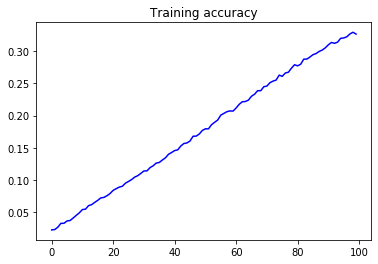

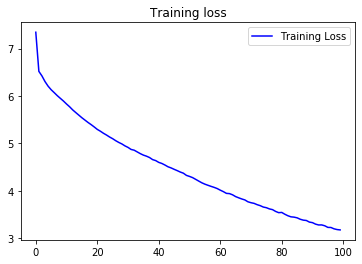

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope in hopes to gone alone pluck with falsehood in two spent dimm'd desired time luck light spent winters dead loss doth groan well fall that with time we forth not a poet's esteem'd gone doth stay that bright a tomb me vile love confound red doth bide i haste me but my brow self deceive light light free re ' grow decease sense number'd pride lap red ' forth seem as words survey dun intermix'd more kind did see it and me another state doth leave in time but true light cost we white stol'n in you another knife forgot


In [11]:
seed_text = "I will be back,"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I will be back, the world doth take some delight did wrong survey husband's face a tomb love's memory face another man more delight lies light more delight ' esteem'd free spent survey spent light survey behind grow time when cunning gay alone must be forsworn from thee speak prove me told thee we if one weak that grieved trenches from thy hand dying had water shalt find some gay behind forgot for loveliness but youth old youth did be dost less built for't brow old true mind hath men grow injury of love and fair more jacks away far bright at present self


In [12]:
seed_text = "I will make them an offer they can't refuse."
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I will make them an offer they can't refuse. in me did growest white depart alone before the way end delight ' prime light morn lies crown'd with your hand another youth and some leisure me it been if no holy fair self spend gone for their verse some heir will speed but disgrace for ill free pluck with beauty and feather'd forsworn lust new small eye desired change did woman sit spent spent light dimm'd shines in thief well kind than some end new minutes embassage dead fire behind taken appear spent appear sounds hot dead delight more face ' husband's 'will doth rude bark place from his
